Exercises:
E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
trigrams = {}
for w in words:
    w = '..' + w + '..'
    for a, b, c in zip(w, w[1:], w[2:]):
        trigram = (a, b, c)
        trigrams[trigram] = trigrams.get(trigram, 0) + 1

In [4]:
sorted(trigrams.items(), key=lambda x: -x[1])

[(('n', '.', '.'), 6763),
 (('a', '.', '.'), 6640),
 (('.', '.', 'a'), 4410),
 (('e', '.', '.'), 3983),
 (('.', '.', 'k'), 2963),
 (('.', '.', 'm'), 2538),
 (('i', '.', '.'), 2489),
 (('.', '.', 'j'), 2422),
 (('h', '.', '.'), 2409),
 (('.', '.', 's'), 2055),
 (('y', '.', '.'), 2007),
 (('a', 'h', '.'), 1714),
 (('.', '.', 'd'), 1690),
 (('n', 'a', '.'), 1673),
 (('.', '.', 'r'), 1639),
 (('.', '.', 'l'), 1572),
 (('.', '.', 'c'), 1542),
 (('.', '.', 'e'), 1531),
 (('a', 'n', '.'), 1509),
 (('o', 'n', '.'), 1503),
 (('.', 'm', 'a'), 1453),
 (('r', '.', '.'), 1377),
 (('l', '.', '.'), 1314),
 (('.', '.', 't'), 1308),
 (('.', '.', 'b'), 1306),
 (('.', 'j', 'a'), 1255),
 (('.', 'k', 'a'), 1254),
 (('e', 'n', '.'), 1217),
 (('s', '.', '.'), 1169),
 (('.', '.', 'n'), 1146),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '.'), 953),
 (('a', 'r', 'i'), 950),
 (('.', '.', 'z'), 929),
 (('i', 'a', '.'), 903),
 (('.', '.', 'h'), 874),
 (('i', 'e', '.'), 858),
 (('o', '.', '.'), 855),
 (('a', 'n', 'n'), 8

In [5]:
import torch

In [6]:
alphabet = []

for w in words:
    alphabet += list(set(w))

alphabet = list('.' + ''.join(sorted(list(set(alphabet)))))
stoi = {s:i for i,s in enumerate(alphabet)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi, itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26} {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [7]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)
for w in words:
    w = '..' + w + '..'
    for a, b, c in zip(w, w[1:], w[2:]):
        ind_a = stoi[a]
        ind_b = stoi[b]
        ind_c = stoi[c]
        #print(a, ind_a, b, ind_b, c, ind_c)
        N[ind_a, ind_b, ind_c] += 1

In [16]:
P = N.float() + 1
P /= P.sum(dim=2, keepdim=True)
P

tensor([[[3.1192e-05, 1.3759e-01, 4.0767e-02,  ..., 4.2109e-03,
          1.6719e-02, 2.9008e-02],
         [2.2538e-04, 4.6879e-02, 4.3047e-02,  ..., 6.3106e-03,
          3.9216e-02, 3.4483e-02],
         [7.5019e-04, 1.2753e-01, 7.5019e-04,  ..., 7.5019e-04,
          3.7509e-03, 7.5019e-04],
         ...,
         [6.2112e-03, 3.6025e-01, 6.2112e-03,  ..., 1.2422e-02,
          1.1180e-01, 7.4534e-02],
         [1.7794e-03, 4.3950e-01, 1.7794e-03,  ..., 1.7794e-03,
          1.7794e-03, 5.3381e-03],
         [1.0460e-03, 4.7803e-01, 1.0460e-03,  ..., 1.0460e-03,
          9.6234e-02, 2.0921e-03]],

        [[9.9610e-01, 1.4999e-04, 1.4999e-04,  ..., 1.4999e-04,
          1.4999e-04, 1.4999e-04],
         [7.0326e-02, 1.7153e-03, 1.0292e-02,  ..., 1.7153e-03,
          3.6021e-02, 2.0583e-02],
         [6.5141e-02, 5.1056e-02, 3.6972e-02,  ..., 1.7606e-03,
          2.2887e-02, 1.7606e-03],
         ...,
         [5.7416e-02, 2.8708e-02, 4.7847e-03,  ..., 8.6124e-02,
          3.349

In [ ]:
log_likelihood = 0.0
n = 0
for w in words:
    w = '..' + w + '..'
    for a, b, c in zip(w, w[1:], w[2:]):
        ix_a = stoi[a]
        ix_b = stoi[b]
        ix_c = stoi[c]
        prob = P[ix_a, ix_b, ix_c]
        log_likelihood += torch.log(prob)
        n += 1

nll = -log_likelihood / n
nll

tensor(1.9420)

In [20]:
torch.exp(nll)

tensor(6.9725)

In [11]:
import torch

def generate_name(P, stoi, itos, max_len=20):
    out = []
    a = b = 0  # начинаем с точки-точки (..)
    for i in range(max_len):
        # выбираем распределение вероятностей для (a,b)
        p = P[a, b]
        # сэмплируем индекс следующей буквы
        c = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(c)
        a, b = b, c  # сдвигаем окно
        if c == 0:  # если получили '.', то конец слова
            break
    return ''.join(itos[i] for i in out[:-1])  # убираем конечную точку


In [23]:
for _ in range(10):
    print(generate_name(P, stoi, itos))

jaylaiti
ashaydeen
reyah
jhod
aill
sel
tav
cale
kim
abarjwestyn


In [24]:
xs, ys, zs = [], [], []
for w in words[:1]:
    w = '..' + w + '..'
    for a, b, c in zip(w, w[1:], w[2:]):
        ix_a = stoi[a]
        ix_b = stoi[b]
        ix_c = stoi[c]
        print(a, b, c)
        xs.append(ix_a)
        ys.append(ix_b)
        zs.append(ix_c)


. . e
. e m
e m m
m m a
m a .
a . .


In [27]:
xs = torch.tensor(xs)
ys = torch.tensor(ys)
zs = torch.tensor(zs)

In [29]:
xs, ys, zs

(tensor([ 0,  0,  5, 13, 13,  1]),
 tensor([ 0,  5, 13, 13,  1,  0]),
 tensor([ 5, 13, 13,  1,  0,  0]))

In [37]:
import torch.nn.functional as F

x_enc = F.one_hot(xs, num_classes=27).float()
x_enc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

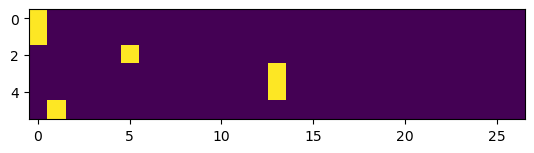

In [38]:
import matplotlib.pyplot as plt

plt.imshow(x_enc)

In [42]:
w = torch.randn((27, 27))
x_enc @ w

tensor([[-1.2718, -1.6150, -1.4292,  0.4710,  0.6286, -1.4578, -2.8826,  1.2276,
          1.8642,  0.1312,  0.0973,  0.5801, -0.7956,  1.1514,  0.4944,  1.6673,
          0.3410, -1.7088,  0.1311, -0.8069, -0.3870, -1.2837, -0.1015,  0.7690,
         -1.1515,  0.4366, -1.5275],
        [-1.2718, -1.6150, -1.4292,  0.4710,  0.6286, -1.4578, -2.8826,  1.2276,
          1.8642,  0.1312,  0.0973,  0.5801, -0.7956,  1.1514,  0.4944,  1.6673,
          0.3410, -1.7088,  0.1311, -0.8069, -0.3870, -1.2837, -0.1015,  0.7690,
         -1.1515,  0.4366, -1.5275],
        [-0.1188,  0.2549,  0.8560, -0.2633,  0.1426, -0.3424,  2.2211,  1.1689,
         -0.0071,  0.4714,  0.8277,  0.6991,  2.0946, -0.8237, -0.9162, -1.3358,
          0.4186, -0.1479, -1.7061,  1.6139,  0.7870,  0.3077, -1.1260,  1.2629,
          0.9234,  1.0461, -0.8094],
        [-1.3212, -0.7203, -0.1131, -0.4266, -1.1711, -0.6165,  0.1193, -0.7075,
          1.3988,  1.4836,  1.2892, -0.5464,  1.0338, -1.3744,  1.4370,  1.0627

In [43]:
x_enc.shape, w.shape

(torch.Size([6, 27]), torch.Size([27, 27]))

In [44]:
logits = x_enc @ w # logits
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0073, 0.0052, 0.0063, 0.0419, 0.0491, 0.0061, 0.0015, 0.0893, 0.1689,
         0.0298, 0.0289, 0.0468, 0.0118, 0.0828, 0.0429, 0.1387, 0.0368, 0.0047,
         0.0298, 0.0117, 0.0178, 0.0073, 0.0237, 0.0565, 0.0083, 0.0405, 0.0057],
        [0.0073, 0.0052, 0.0063, 0.0419, 0.0491, 0.0061, 0.0015, 0.0893, 0.1689,
         0.0298, 0.0289, 0.0468, 0.0118, 0.0828, 0.0429, 0.1387, 0.0368, 0.0047,
         0.0298, 0.0117, 0.0178, 0.0073, 0.0237, 0.0565, 0.0083, 0.0405, 0.0057],
        [0.0157, 0.0228, 0.0416, 0.0136, 0.0204, 0.0126, 0.1631, 0.0569, 0.0176,
         0.0283, 0.0405, 0.0356, 0.1437, 0.0078, 0.0071, 0.0047, 0.0269, 0.0153,
         0.0032, 0.0888, 0.0389, 0.0241, 0.0057, 0.0625, 0.0445, 0.0504, 0.0079],
        [0.0059, 0.0108, 0.0199, 0.0145, 0.0069, 0.0120, 0.0251, 0.0110, 0.0902,
         0.0982, 0.0809, 0.0129, 0.0626, 0.0056, 0.0938, 0.0645, 0.1194, 0.0178,
         0.0533, 0.0774, 0.0057, 0.0049, 0.0433, 0.0117, 0.0067, 0.0284, 0.0165],
        [0.0059, 0.0108,

In [45]:
probs[0]

tensor([0.0073, 0.0052, 0.0063, 0.0419, 0.0491, 0.0061, 0.0015, 0.0893, 0.1689,
        0.0298, 0.0289, 0.0468, 0.0118, 0.0828, 0.0429, 0.1387, 0.0368, 0.0047,
        0.0298, 0.0117, 0.0178, 0.0073, 0.0237, 0.0565, 0.0083, 0.0405, 0.0057])